### ***Aproximación Lineal***
En este cuaderno se muestran dos formas de aproximar un conjunto de datos a una función lineal. El primer método consiste en el método de los mínimos cuadrados en el cual se usan las ecuaciones normales para encontrar los valores de los parámetros de la función lineal. El segundo método consiste en la aplicación de un perceptrón que es entrenado sobre un conjunto de datos y calcula los valores de los parámetros de la función lineal llegando a los mismos resultados.

In [1]:
# Importar las librerias necesarisa
import numpy as np
import matplotlib.pyplot as plt

#### ***Método de los Mínimos Cuadrados***
En el siguiente código se definen un conjunto de datos para realizar la aproximación mediante el método de los mínimos cuadrados. Con ellos se usan las fórmulas establecidas en el documento para calcular los valores de los parámetros de la función lineal.

Coeficiente a_0 (Intercepto): 1.300
Coeficiente a_1 (Pendiente): 0.700


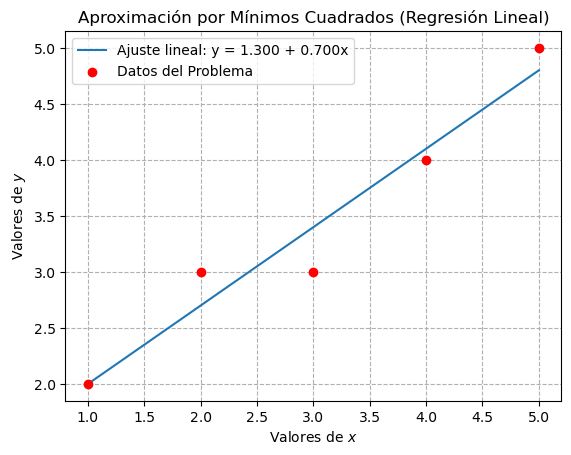

In [4]:
# Datos del ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 3, 4, 5])

# Calcular las sumatorias necesarias
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_cuadrado = np.sum(x**2)
sum_xy = np.sum(x * y)

# Formar el sistema de ecuaciones
A = np.array([[n, sum_x],
              [sum_x, sum_x_cuadrado]])

b = np.array([sum_y, sum_xy])

# Resolver el sistema de ecuaciones lineales
coeficientes = np.linalg.solve(A, b)
a_0 = coeficientes[0]
a_1 = coeficientes[1]

print(f"Coeficiente a_0 (Intercepto): {a_0:.3f}")
print(f"Coeficiente a_1 (Pendiente): {a_1:.3f}")

# Generar los puntos para graficar el ajuste lineal
x_dom = np.linspace(min(x), max(x), 100)
y_eval = a_0 + a_1 * x_dom

# Graficar los datos y la línea de ajuste
plt.plot(x_dom, y_eval, label=f"Ajuste lineal: y = {a_0:.3f} + {a_1:.3f}x")
plt.scatter(x, y, c='red', zorder=3, label="Datos del Problema")
plt.xlabel("Valores de $x$")
plt.ylabel("Valores de $y$")
plt.title("Aproximación por Mínimos Cuadrados (Regresión Lineal)")
plt.legend()
plt.grid(linestyle='--')

# Guardar la gráfica y mostrar
plt.savefig('../Teoria-Aproximacion/Imagenes/Regresion-Lineal.pdf')
plt.show()

#### ***Método:*** Entrenamiento de un Perceptrón
En este método se usa una neurona artificial llamada perceptron que es entrenada con el mismo conjunto de datos del método anterior. Para su entrenamiento se usa el método del descenso del gradiente para actualiar los pesos de los parámetros de la función lineal que se esta buscando.

Peso w aprendido: 0.710
Sesgo b aprendido: 1.265
La función aproximada por el perceptron es: f(x) = 1.265 + 0.710x


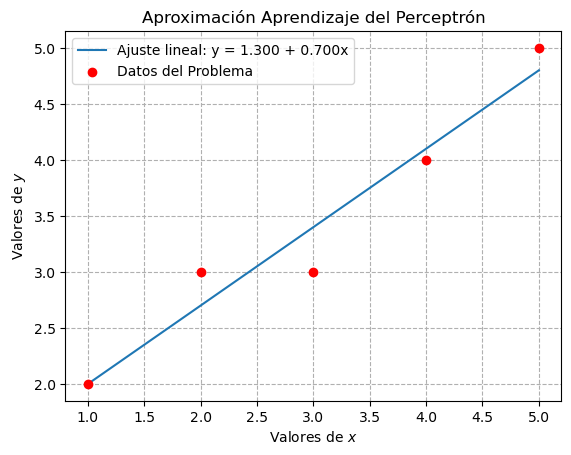

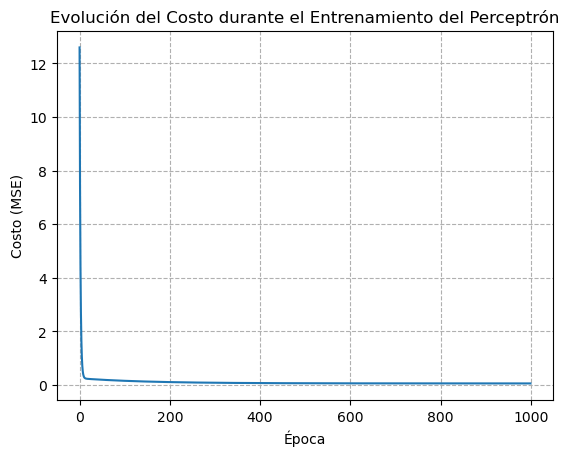

In [6]:
# Datos del ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 3, 4, 5])
n = len(x)

# Inicialización del peso y el sesgo
w = 0.0
b = 0.0
tasa_aprendizaje = 0.01

# Definir el número de iteraciones del aprendizaje
epocas = 1000

# Historial de la función de costo
historial = []

# Entrenamiento mediante el descenso del gradiente
for epoca in range(epocas):
    
    # Calcular las predicciones del perceptron
    y_ = w*x+b
    
    # Calcular el costo (MSE)
    costo = np.mean((y_ - y)**2)
    historial.append(costo)
    
    # Calcular los gradientes
    dw = (2/n) * np.sum((y_ - y) * x)
    db = (2/n) * np.sum(y_ - y)
    
    # Actualizar el peso y el sesgo
    w = w - tasa_aprendizaje * dw
    b = b - tasa_aprendizaje * db
    
# Imprimir el peso y el sesgo
print(f"Peso w aprendido: {w:.3f}")
print(f"Sesgo b aprendido: {b:.3f}")
print(f"La función aproximada por el perceptron es: f(x) = {b:.3f} + {w:.3f}x")

# Crear el dominio y rango de graficación
x_dom = np.linspace(min(x), max(x), 100)
y_eval = a_0 + a_1 * x_dom

# Graficar los datos y la línea de ajuste
plt.plot(x_dom, y_eval, label=f"Ajuste lineal: y = {a_0:.3f} + {a_1:.3f}x")
plt.scatter(x, y, c='red', zorder=3, label="Datos del Problema")
plt.xlabel("Valores de $x$")
plt.ylabel("Valores de $y$")
plt.title("Aproximación Aprendizaje del Perceptrón")
plt.legend()
plt.grid(linestyle='--')

# Guardar la gráfica y mostrar
plt.savefig('../Teoria-Aproximacion/Imagenes/Ajuste-Lineal-Perceptron.pdf')
plt.show()

# Gráfica de la función de costo durante el entrenamiento
plt.figure()
plt.plot(range(epocas), historial)
plt.xlabel('Época')
plt.ylabel('Costo (MSE)')
plt.title("Evolución del Costo durante el Entrenamiento del Perceptrón")
plt.grid(linestyle='--')

# Guardar y mostrar la gráfica
plt.savefig('../Teoria-Aproximacion/Imagenes/Evolucion-Costo.pdf')
